<a href="https://colab.research.google.com/github/anuraged51a/ALS-Assistant/blob/master/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Values
df = pd.read_csv('/content/drive/MyDrive/Telecom Customer Churn Prediction/data.csv', sep = ',', decimal = '.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head(8000)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#Data Transformation
df.drop('customerID', axis = 1, inplace = True)

df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'No')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1, 'Yes')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(value = 0)

In [6]:
#Data Description
df.describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [7]:
#Checking for Missing Data
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

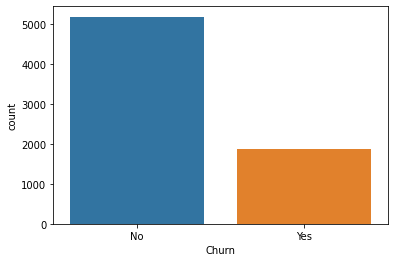

In [8]:
#Churn Distribution through Count Plot(Box Chart)
sns.countplot(x = 'Churn', data = df)
df.loc[:, 'Churn'].value_counts()

In [9]:
#Unique Column Values
categorical = df.select_dtypes(include = 'object').drop('Churn', axis = 1).columns.tolist()
numerical = df.select_dtypes(exclude = 'object').columns.tolist()
for c in categorical:
  print('{} : {}'.format(c, len(df[c].unique())))

gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4


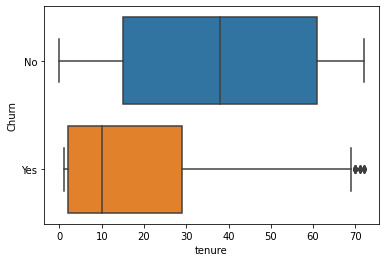

In [10]:
#Outlier Analysis through Box Plots
sns.boxplot(x = df['tenure'], y = df['Churn'])

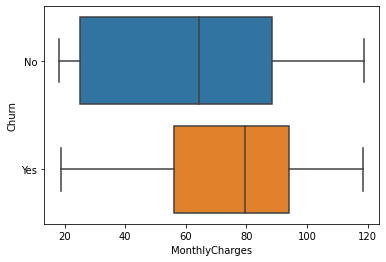

In [11]:
sns.boxplot(x = df['MonthlyCharges'], y = df['Churn'])

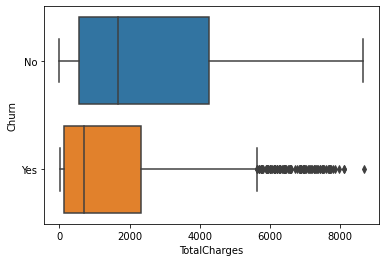

In [12]:
sns.boxplot(x = df['TotalCharges'], y = df['Churn'])

In [13]:
#Label Encoding and Outlier Removal
from sklearn.preprocessing import LabelEncoder
encoded = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
encoded.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [14]:
customerlost = encoded.loc[encoded['Churn'].abs() > 0]
customerlost

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
13,1,0,0,0,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80,1
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
7032,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75,1
7034,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25,1


In [15]:
Q1_A = customerlost['TotalCharges'].quantile(0.25)
Q3_A = customerlost['TotalCharges'].quantile(0.75)
IQR_A = Q3_A - Q1_A
Q_A = Q3_A + (1.5*IQR_A)
Q_A

5626.5

In [16]:
encoded_out_A = encoded[(encoded['TotalCharges'] >= Q_A) & (encoded['Churn'] > 0)]
encoded.drop(encoded_out_A.index, inplace = True)
encoded.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [17]:
Q1_B = customerlost['tenure'].quantile(0.25)
Q3_B = customerlost['tenure'].quantile(0.75)
IQR_B = Q3_B - Q1_B
Q_B = Q3_B + (1.5*IQR_B)
Q_B

69.5

In [18]:
encoded_out_B = encoded[(encoded['tenure'] >= Q_B) & (encoded['Churn'] > 0)]
encoded.drop(encoded_out_B.index, inplace = True)
encoded.head(8000)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [20]:
#Correlation Anlaysis
y = encoded['Churn']

x_list = encoded.drop('Churn', axis = 1).columns.tolist()
for x_item in x_list:
  print(x_item + ": " + str((encoded[x_item]).corr(y)*100))

gender: -1.2333982531533874
SeniorCitizen: 14.96870049233752
Partner: -16.73600882534341
Dependents: -16.443571660877733
tenure: -40.2039169155568
PhoneService: 0.563840961313923
MultipleLines: 1.4006151898400085
InternetService: -5.155091367880411
OnlineSecurity: -29.820374046405995
OnlineBackup: -21.92236211977568
DeviceProtection: -20.358590281391788
TechSupport: -29.391285051676025
StreamingTV: -6.49645534523963
StreamingMovies: -6.501939097413083
Contract: -41.80453259280454
PaperlessBilling: 18.65494906327253
PaymentMethod: 11.965899910386126
MonthlyCharges: 16.54979904537399
TotalCharges: -26.365971540819476


In [21]:
#Drop columns having correlation less than 10
encoded.drop('gender', axis = 1, inplace = True)
encoded.drop('PhoneService', axis = 1, inplace = True)
encoded.drop('MultipleLines', axis = 1, inplace = True)
encoded.drop('InternetService', axis = 1, inplace = True)
encoded.drop('StreamingTV', axis = 1, inplace = True)
encoded.drop('StreamingMovies', axis = 1, inplace = True)

In [23]:
#Logistic Regression
x = encoded.drop('Churn', axis = 1)
y = encoded['Churn']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.15, random_state = 21)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
lg_regressor = LogisticRegression(C = 0.5, tol = 0.1, multi_class = 'multinomial', solver = 'newton-cg', penalty = 'l2', max_iter = 100)
lg_regressor.fit(x_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.1, verbose=0,
                   warm_start=False)

In [26]:
y_pred = lg_regressor.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
classification_report(y_true = y_test, y_pred = y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88      4388\n           1       0.65      0.56      0.60      1503\n\n    accuracy                           0.81      5891\n   macro avg       0.75      0.73      0.74      5891\nweighted avg       0.80      0.81      0.81      5891\n'

In [28]:
accuracy_score(y_test, y_pred)*100

81.14072313698863

In [29]:
confusion_matrix(y_test, y_pred)

array([[3940,  448],
       [ 663,  840]])